Found 633 images belonging to 2 classes.
Found 158 images belonging to 2 classes.


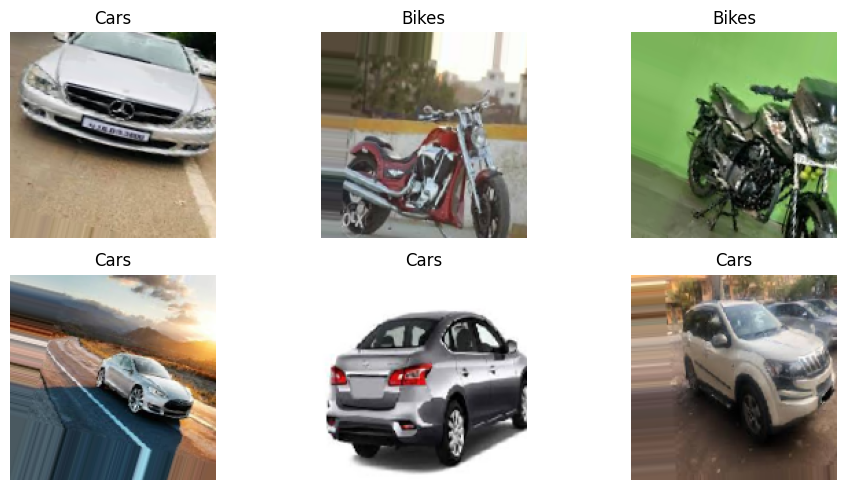

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image dimensions and batch size
img_height = 150
img_width = 150
batch_size = 32

# Define the path to the dataset (should contain 'Bikes/' and 'Cars/' subfolders)
dataset_path = 'images/train'

# Create an ImageDataGenerator with normalization and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split 80% for training, 20% for validation
)

# Create the training set (80% of the data)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Create the validation set (20% of the data)
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Load one batch of images and labels for preview
images, labels = next(train_generator)

# Get the class names (e.g., ['Bikes', 'Cars'])
class_names = list(train_generator.class_indices.keys())

# Plot a few sample images with their labels
plt.figure(figsize=(10, 5))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    label = class_names[int(labels[i])]
    plt.title(label)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialize the Sequential model
model = Sequential()

# --- Block 1 ---
# First convolutional layer to extract low-level features
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Normalize activations to stabilize learning
model.add(BatchNormalization())

# Downsample feature maps to reduce spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Block 2 ---
# Second convolutional layer to learn more complex patterns
model.add(Conv2D(64, (3, 3), activation='relu'))

# Batch normalization for improved training stability
model.add(BatchNormalization())

# Max pooling again to reduce spatial size
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Block 3 ---
# Third convolutional layer to learn high-level features
model.add(Conv2D(128, (3, 3), activation='relu'))

# Batch normalization after the third convolution
model.add(BatchNormalization())

# Third pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Fully Connected Layers ---
# Flatten 2D feature maps into a 1D vector
model.add(Flatten())

# Dense layer to learn complex feature combinations
model.add(Dense(128, activation='relu'))

# Dropout to reduce overfitting during training
model.add(Dropout(0.5))

# Output layer for binary classification with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model with appropriate loss function and optimizer
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture summary
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)